## **Домашняя работа 1.** (до 5 ноября)
*изначально написанный текст тетрадки*
Изучаем графовые *языковые модели*, построенные на основе совместной встречаемости слов. Это исследовательская работы, которая требует от вас как применения методов, которые мы изучали, так и качественного и количественного анализа результатов. Вы столкнетесь с вычислительными проблемами, если будете использовать методы, не думаю о том, какова их алгоритмическая сложность.  Далее будет описан примерный пул вопросов, на которые я ожидаю от вас ответов. Будьте уверены, ваша инициатива в исследовании будет оценена.    

In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [473]:
from collections import Counter

*изначально написанный текст тетрадки* Даннные для посторения графа уже здесь. Остались мелочи...

In [8]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [3]:
brown.raw()[:100]

'\n\n\tThe/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn'

In [4]:
brown.sents()[:1]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.']]

In [557]:
#!pip install spacy
#!pip spacy download en
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

In [562]:
import networkx as nx
from typing import List
import matplotlib.pyplot as plt
# create indirected graph (0.5 points)
# create directed grpah (0.5 points)
# create function which can work with different window size (from 1 to 7) (1 point)
import re
def create_lm_coocurance(sentences:List[List[str]], window_size: int = 2, is_directed: bool = True):
  """your code here
  :sentences
  :return: graph object (networkx object), pairs of words that you add t the graph"""
  if is_directed == False:
    graph = nx.Graph()
  else:
    graph = nx.DiGraph()
  pairs = []
  for sent in sentences:
    lemmas_list = []
    clean_sent = []
    lemmas = nlp(" ".join(sent))
    [lemmas_list.append(token.lemma_.lower()) for token in lemmas]
    for word in lemmas_list:
      word = re.sub("\W", "", word)
      word = re.sub("\d", "", word)
      if word != "" and word != "pron" and len(word) > 1:
        clean_sent.append(word)
    for i, word in enumerate(clean_sent):
      if ((i-window_size) > 0):
        pairs.append([word, clean_sent[i-window_size]])
      if ((i+window_size) < len(clean_sent)):
        pairs.append([word, clean_sent[i+window_size]])
  for pair in pairs:
    graph.add_edge(pair[0], pair[1])
  return graph, pairs
#print(len(brown.sents())) просто интересовался сколько там текстов :)
g, ps = create_lm_coocurance(brown.sents()[:10], 3, False)

10 текстов из корпуса; окно = 2, граф ненаправленный.

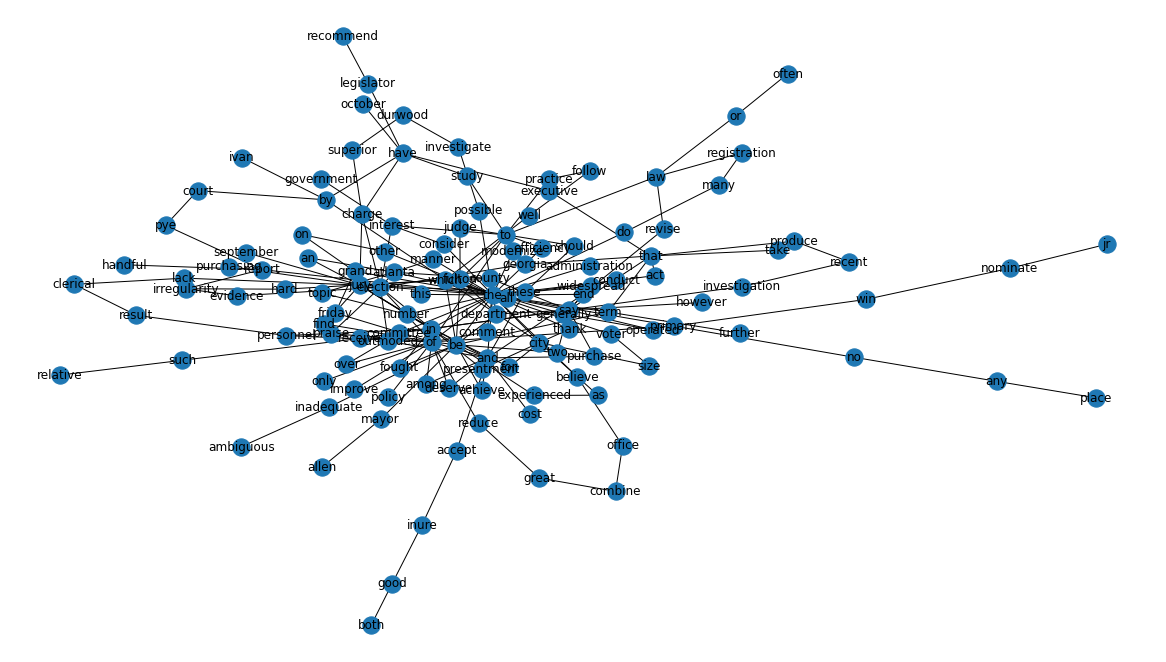

In [563]:
pos = nx.spring_layout(g)
plt.figure(figsize=(16, 9))
nx.draw(g, pos, with_labels=True)

## Descriptive analysis

*изначально написанный текст тетрадки* Посмотрите сколько компонент, вершин, ребер. Если компонент несколько, не забывайте при анализе это учитывать. Плотность. Средняя степень вершины в графе. (2 points)

In [564]:
from networkx import density 

def descriptive_analysis(g):
  print("Компонент: {}".format(nx.number_connected_components(g)))
  print("Вершин: {}".format(len(g.nodes())))
  print("Рёбер: {}".format(len(g.edges())))
  print("Плотность: {}".format(nx.density(g)))
  print("Средняя степень вершины: {}".format(len(g.edges())/len(g.nodes())))

In [565]:
descriptive_analysis(g)

Компонент: 1
Вершин: 131
Рёбер: 205
Плотность: 0.024075161479741633
Средняя степень вершины: 1.5648854961832062


*изначально написанный текст тетрадки*
*   Расcчитайте распределние степеней вершин внутри графа и постройте график (1 point)


*   Сделайте log-log scale для этих значений (1 point) 


*   Проверьте, если здесь powerlaw distribution (1 point) (то есть постройте апроксимирующую прямую) Дайте анализ результатам с учетом того, что ваш граф не является scale-free network 


тут есть пример - https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html 

In [566]:
import collections
import math
import numpy as np

def DegSeq_and_DegCount(g):
  degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
  degree_count = collections.Counter(degree_sequence)
  return degree_count, degree_sequence

def hist_of_degree_distr(g):
  degree_count, degree_sequence = DegSeq_and_DegCount(g)
  deg, cnt = zip(*degree_count.items())
  plt.bar(deg, cnt, width=0.80)
  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  plt.show()

def loglog_scale(g):
  degree_count, degree_sequence = DegSeq_and_DegCount(g)
  plt.title("Log-log of degree desctribution")
  plt.scatter([math.log(i) for i in degree_count.keys()], [math.log(i) for i in degree_count.values()])
  plt.show()

def loglog_and_lin_regression(g):
  degree_count, degree_sequence = DegSeq_and_DegCount(g)
  x = np.array([math.log(i) for i in degree_count.keys()])
  y = np.array([math.log(i) for i in degree_count.values()])
  m, b = np.polyfit(x, y, 1)
  plt.scatter(x, y)
  plt.plot(x, m*x + b)
  plt.title("Log-log of degree desctribution with linear regression")
  plt.show()

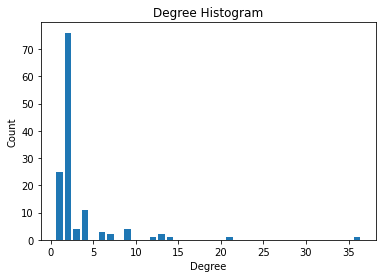

In [567]:
hist_of_degree_distr(g)

Больше всего вершин, у которых есть связь ещё с 2 вершинами.

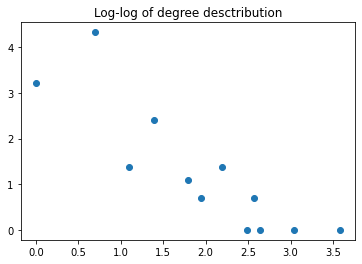

In [568]:
loglog_scale(g)

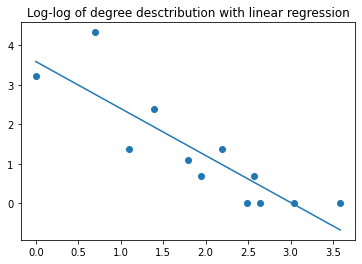

In [569]:
loglog_and_lin_regression(g)

*изначально написанный текст тетрадки* Используйте ваши знания о центральностях и об их применимости к тем или иным типам графов. Рассчитайте их (возможно на сабграфе), сделайте отображение графа, на котором размер вершины будет зависить от показателя центральности, ну или цветом, как здесь: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html#sphx-glr-auto-examples-drawing-plot-random-geometric-graph-py
(3 points)

*изначально написанный текст тетрадки* Не забудь проанализировать, ведь визуализация (иногда) ключ к пониманию

In [573]:
def centralities(g):
    centralities = nx.degree_centrality(g), nx.closeness_centrality(g), nx.eigenvector_centrality(g), nx.betweenness_centrality(g)
    return centralities

In [574]:
centralities = centralities(g)

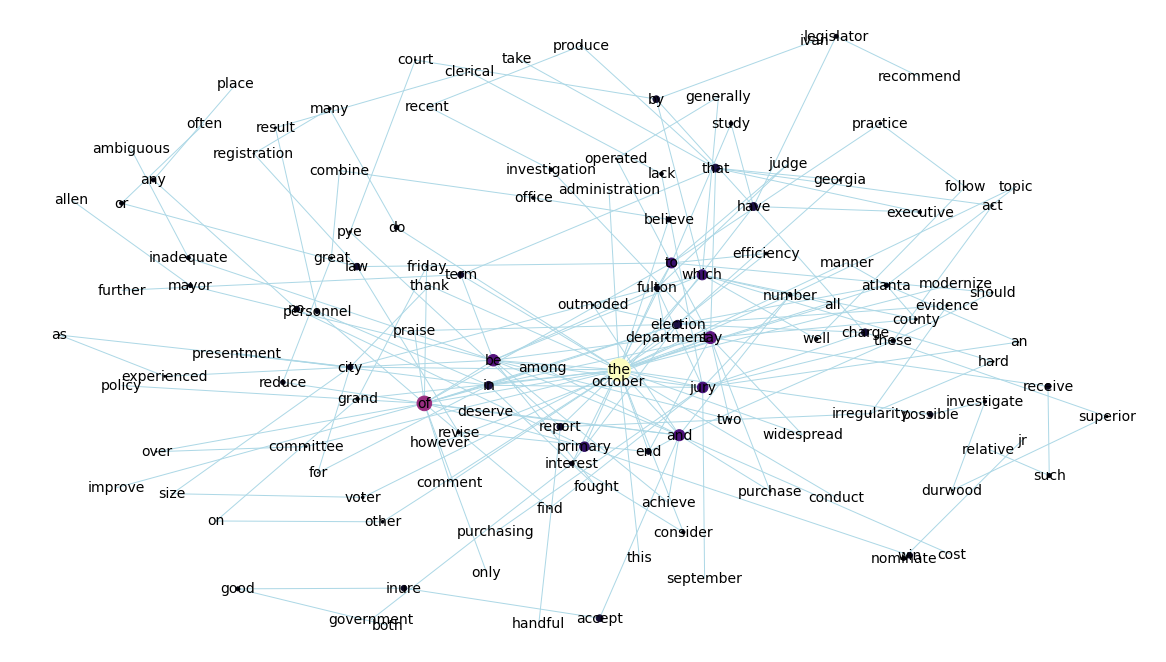

In [575]:
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(g, k=5/math.sqrt(len(g.nodes()))) #пытался сделать больше расстояние между узлами
nx.draw(g, 
        pos, 
        with_labels=True, 
        font_size = 14,
        font_color = 'black',
        edge_color = 'lightblue',
        node_size= list([i*1000 for i in nx.betweenness_centrality(g).values()]),
        node_color=list(nx.betweenness_centrality(g).values()), 
        cmap=plt.cm.magma)

Сложно сделать какие-то полезные выходы из такого анализа текстов. Самый высокий коэффициент betweenness centrality – у служебных слов, поскольку через эти вершины проходит много кратчайших путей (это вроде предсказуемо). Кажется, что немалый коэффициент betweenness centrality у слов, связанных так или иначе с политикой. 

# Поиск сообществ

*изначально написанный текст тетрадки* Посмотрел, какие слова кластеризовались, но тут кажется ничего вразумительного

In [576]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman(g)
res = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}
# бинарное разбиение исходного графа на сообщетва
res

{0: ['accept',
  'achieve',
  'act',
  'administration',
  'all',
  'allen',
  'ambiguous',
  'among',
  'an',
  'and',
  'as',
  'atlanta',
  'be',
  'believe',
  'both',
  'by',
  'charge',
  'city',
  'clerical',
  'combine',
  'comment',
  'committee',
  'conduct',
  'consider',
  'cost',
  'county',
  'court',
  'department',
  'deserve',
  'do',
  'durwood',
  'efficiency',
  'election',
  'end',
  'evidence',
  'executive',
  'experienced',
  'find',
  'follow',
  'for',
  'fought',
  'friday',
  'fulton',
  'further',
  'generally',
  'georgia',
  'good',
  'government',
  'grand',
  'great',
  'handful',
  'hard',
  'have',
  'however',
  'improve',
  'in',
  'inadequate',
  'interest',
  'inure',
  'investigate',
  'investigation',
  'irregularity',
  'ivan',
  'judge',
  'jury',
  'lack',
  'law',
  'legislator',
  'manner',
  'many',
  'mayor',
  'modernize',
  'number',
  'october',
  'of',
  'office',
  'often',
  'on',
  'only',
  'operated',
  'or',
  'other',
  'outmod

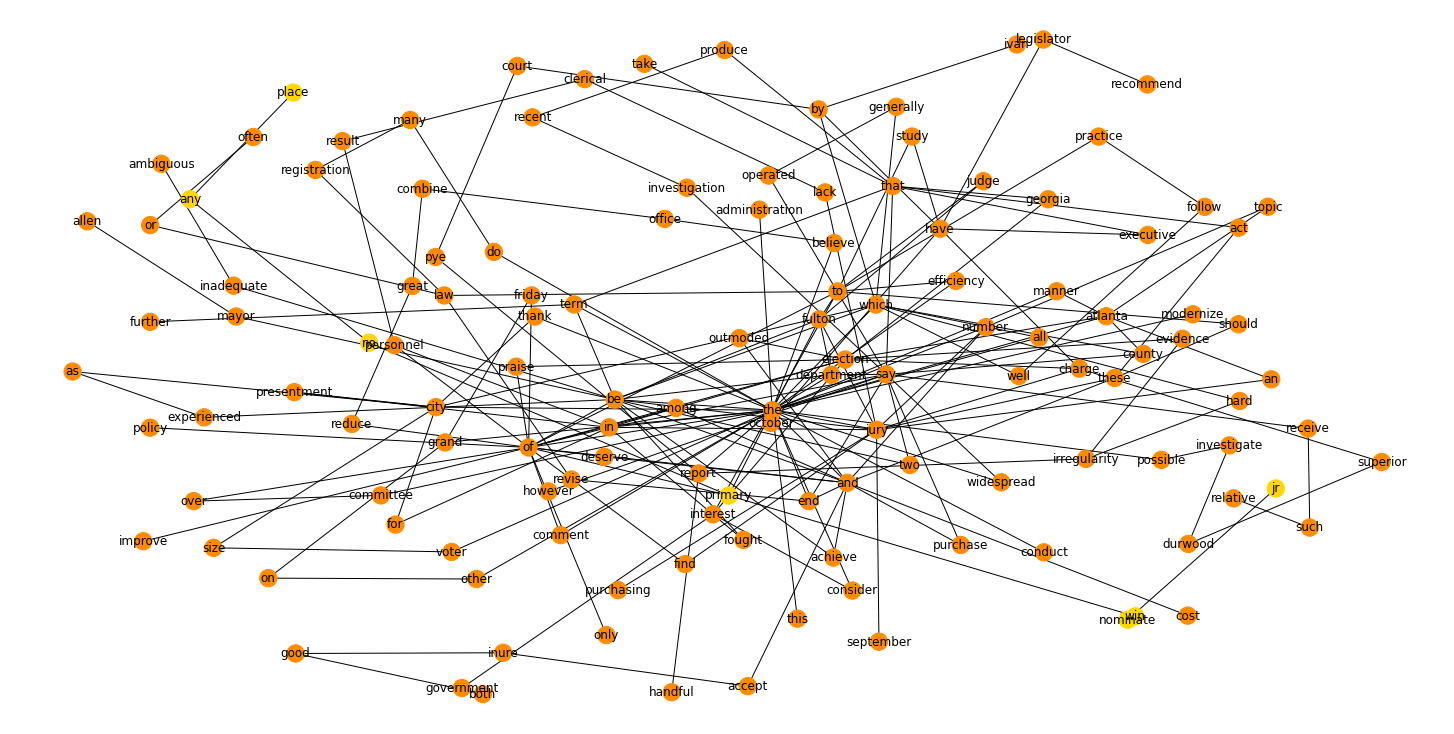

In [577]:
subset_color = [
    "gold",
    "violet",
    "limegreen",
    "darkorange",
]
color = [ ]
for v in g.nodes():
    for i, words in res.items():
        if v in words:
            color.append(subset_color[i-1])
plt.figure(figsize=(20, 10))

nx.draw(g, pos, node_color=color, with_labels=True)
plt.show()

*изначально написанный текст тетрадки* Ваша задача: применить методы поиска сообществ и попытаться интерпретировать выдачу (3 points)

При анализе я использовал https://python-louvain.readthedocs.io/en/latest/ 
Кажется, выделение сообществ не даёт каких-то интерпретируемых результатов. 

In [1]:
from community import community_louvain
best_partition = community_louvain.best_partition(g)
modularity = community_louvain.modularity(best_partition, g)

print('Сообществ: {}'.format(max(best_partition.values())))
print('Модулярность: {}'.format(modularity))
pos = nx.spring_layout(g)
plt.figure(figsize=(16, 9))
nx.draw(g, 
        pos, 
        with_labels=True, 
        font_size = 14,
        font_color = 'black',
        edge_color = 'lightblue',
        node_size= 100,
        node_color=list(best_partition.values()), 
        cmap=plt.cm.magma)

NameError: name 'g' is not defined

In [583]:
import itertools
k = 2
# Посмотрим чуть глубже: 2 означает еще две итерации деления на сообщества  
for communities in itertools.islice(comp, k):
    print({indx: words for indx, words in enumerate(tuple(sorted(c) for c in communities))})  

{0: ['administration', 'believe', 'combine', 'comment', 'committee', 'conduct', 'consider', 'do', 'durwood', 'efficiency', 'friday', 'grand', 'great', 'investigate', 'manner', 'many', 'modernize', 'office', 'on', 'other', 'over', 'possible', 'reduce', 'registration', 'size', 'superior', 'thank', 'the', 'this', 'voter'], 1: ['achieve', 'act', 'allen', 'ambiguous', 'among', 'an', 'and', 'as', 'atlanta', 'be', 'charge', 'city', 'clerical', 'cost', 'county', 'department', 'deserve', 'election', 'end', 'executive', 'experienced', 'find', 'for', 'fought', 'fulton', 'further', 'georgia', 'government', 'have', 'however', 'improve', 'in', 'inadequate', 'interest', 'investigation', 'judge', 'jury', 'lack', 'law', 'legislator', 'mayor', 'number', 'october', 'of', 'often', 'only', 'or', 'outmoded', 'personnel', 'policy', 'praise', 'presentment', 'produce', 'purchase', 'purchasing', 'receive', 'recent', 'recommend', 'relative', 'result', 'revise', 'say', 'september', 'should', 'study', 'such', 'tak

*изначально написанный текст тетрадки* Подарок для вас со стак оферфлоу: отрисовка графовой кластеризации с помощью дендрограммы (работает только с выходом из функции girvan_newman)

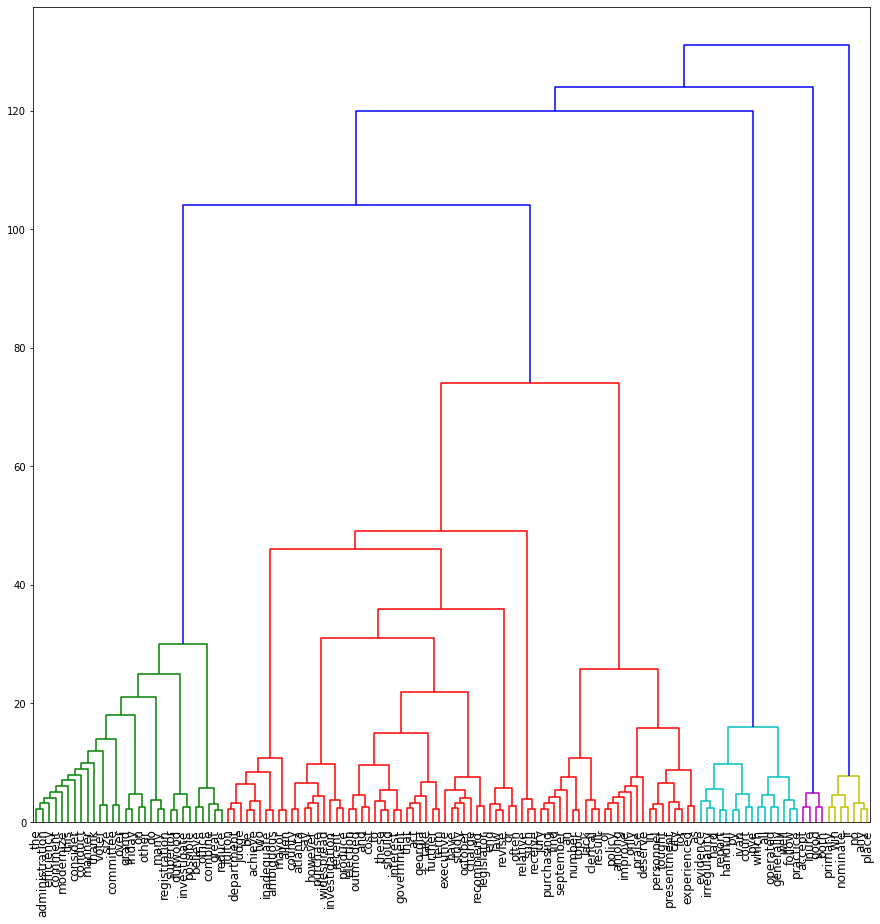

In [584]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import networkx.algorithms.community.centrality

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub, node_labels, subset_rank_dict):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

def plot_dendrogram(G, method_to_find_community = girvan_newman):
    communities = list(method_to_find_community(G))
  # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

  # turning this dictionary to the desired format in @mdml's answer
  node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
  for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
      for node_id_parent, group in init_node2community_dict.items():
          if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
              node_id_to_children[node_id_parent].append(node_id1)
              node_id_to_children[node_id_parent].append(node_id2)

  # also recording node_labels dict for the correct label for dendrogram leaves
  node_labels = dict()
  for node_id, group in init_node2community_dict.items():
      if len(group) == 1:
          node_labels[node_id] = list(group)[0]
      else:
          node_labels[node_id] = ''

  # also needing a subset to rank dict to later know within all k-length merges which came first
  subset_rank_dict = dict()
  rank = 0
  for e in communities[::-1]:
      for p in list(e):
          if tuple(p) not in subset_rank_dict:
              subset_rank_dict[tuple(sorted(p))] = rank
              rank += 1
  subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

  # finally using @mdml's magic, slightly modified:
  G           = nx.DiGraph(node_id_to_children)
  nodes       = G.nodes()
  leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
  inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

  # Compute the size of each subtree
  subtree = dict( (n, [n]) for n in leaves )
  for u in inner_nodes:
      children = set()
      node_list = list(node_id_to_children[u])
      while len(node_list) > 0:
          v = node_list.pop(0)
          children.add( v )
          node_list += node_id_to_children[v]
      subtree[u] = sorted(children & leaves)

  inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

  # Construct the linkage matrix
  leaves = sorted(leaves)
  index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
  Z = []
  k = len(leaves)
  for i, n in enumerate(inner_nodes):
      children = node_id_to_children[n]
      x = children[0]
      for y in children[1:]:
          z = tuple(sorted(subtree[x] + subtree[y]))
          i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
          Z.append([i, j, get_merge_height(subtree[n], node_labels, subset_rank_dict), len(z)]) # <-- float is required by the dendrogram function
          index[z] = k
          subtree[z] = list(z)
          x = z
          k += 1

  plt.figure(figsize=(15, 15))
  dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
  plt.xticks(fontsize=12)
  plt.show()#

plot_dendrogram(g)

*изначально написанный текст тетрадки* Можете применить при подготовке корпуса любые другие фишки, котоыре вы умеете использовать, как то снятие частеречной омонимии и прочее. Инициатива поощряется, без нее 10 не поставлю :)